<a href="https://colab.research.google.com/github/hungpham89/Housing_price/blob/main/House_price_ordinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
#importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time #import time library as we will need to use it to check the runtime of our model
from datetime import timedelta
from tempfile import mkdtemp

pd.set_option('display.max_columns', None)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

In [ ]:
import time

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import VarianceThreshold
#!pip install --upgrade lightgbm
#!pip install xgboost
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as XGB

## 1. Loading data

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/hungpham89/Housing_price/main/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.shape

(1460, 81)

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/hungpham89/Housing_price/main/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
test.shape

(1459, 80)

## 2. Explanatory Data Analysis (EDA)


### Cleaning empty values

Let's check all the available columns first:

In [ ]:
display(train.columns)
display(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Visually, we can see that our data is quite consistent, train and test both have the same columns, except the `SalePrice` column, which is our target value.



For reference, I copied the data dictionary here (from Kaggle) for better understanding of our columns:



First off, we will get the list of the columns contain empty values

In [ ]:
train.isnull().mean()[train.isnull().mean() > 0].sort_values(ascending = False)*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [ ]:
test.isnull().mean()[test.isnull().mean() > 0].sort_values(ascending = False)*100

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64

We will remove columns that has more than 20% missing values, as they arent contribute to the model, also `Id` columns.  
Note that we will do all the evaluation based on `train` df, and apply these actions on the `test` df.

In [ ]:
drop_col = train.columns[train.isnull().mean() > 0.2]
drop_col

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
train = train.drop(columns = drop_col)
train = train.drop(columns = 'Id')
test = test.drop(columns = drop_col)
test = test.drop(columns = 'Id')

Checking and removing duplicates.  
Note that we dont remove duplicates from `test` set, as they have no effect on the model and need the exact same number of row to submit

In [ ]:
train.drop_duplicates()
train.shape

(1460, 75)

Reviewing the data description, we can see that several columns has `empty values` as a valid data values (which mean the house doesnt have that feature), these columns are:
- MasVnrType
- MasVnrArea	
- BsmtQual
- BsmtCond
- BsmtExposure: 
- BsmtFinType1: 
- BsmtFinType2: 
- GarageType: 
- GarageYrBlt
- GarageFinish: 
- GarageQual: 
- GarageCond: 

For these columns, we will replace NaN values with the word `NA`.  

For the missing numeric columns, we can replace null values with the median.  

The rest will be fill with most common values (mode)

In [ ]:
#Columns to fill with most popular(mode):
mode_fill_col = ['MSZoning',  'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType','Electrical', 'BsmtFullBath',
                   'BsmtHalfBath', 'KitchenQual', 'Functional',   'GarageYrBlt',  'GarageCars', 'SaleType']

#columns to fill with 'NA'
NA_fill_col = ['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'GarageType','GarageFinish','GarageQual', 'GarageCond']

#Columns to fill with mean
mean_fill_col = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageArea', 
                 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF']

In [ ]:
def replace_values(df):
    for i in mode_fill_col:
        df[i].fillna(df[i].mode()[0], inplace=True)
    for i in NA_fill_col:
        df[i].fillna('NA', inplace=True)
    for i in mean_fill_col:
        df[i].fillna(df[i].mean(), inplace=True)

Replace both `train` and `test` df

In [ ]:
replace_values(train)
replace_values(test)

In [ ]:
#sanity check for any leftover empty values
print(f'There are {train.isnull().sum().sum()+test.isnull().sum().sum()} missing values')

There are 0 missing values


### Analyzing relationships between variables

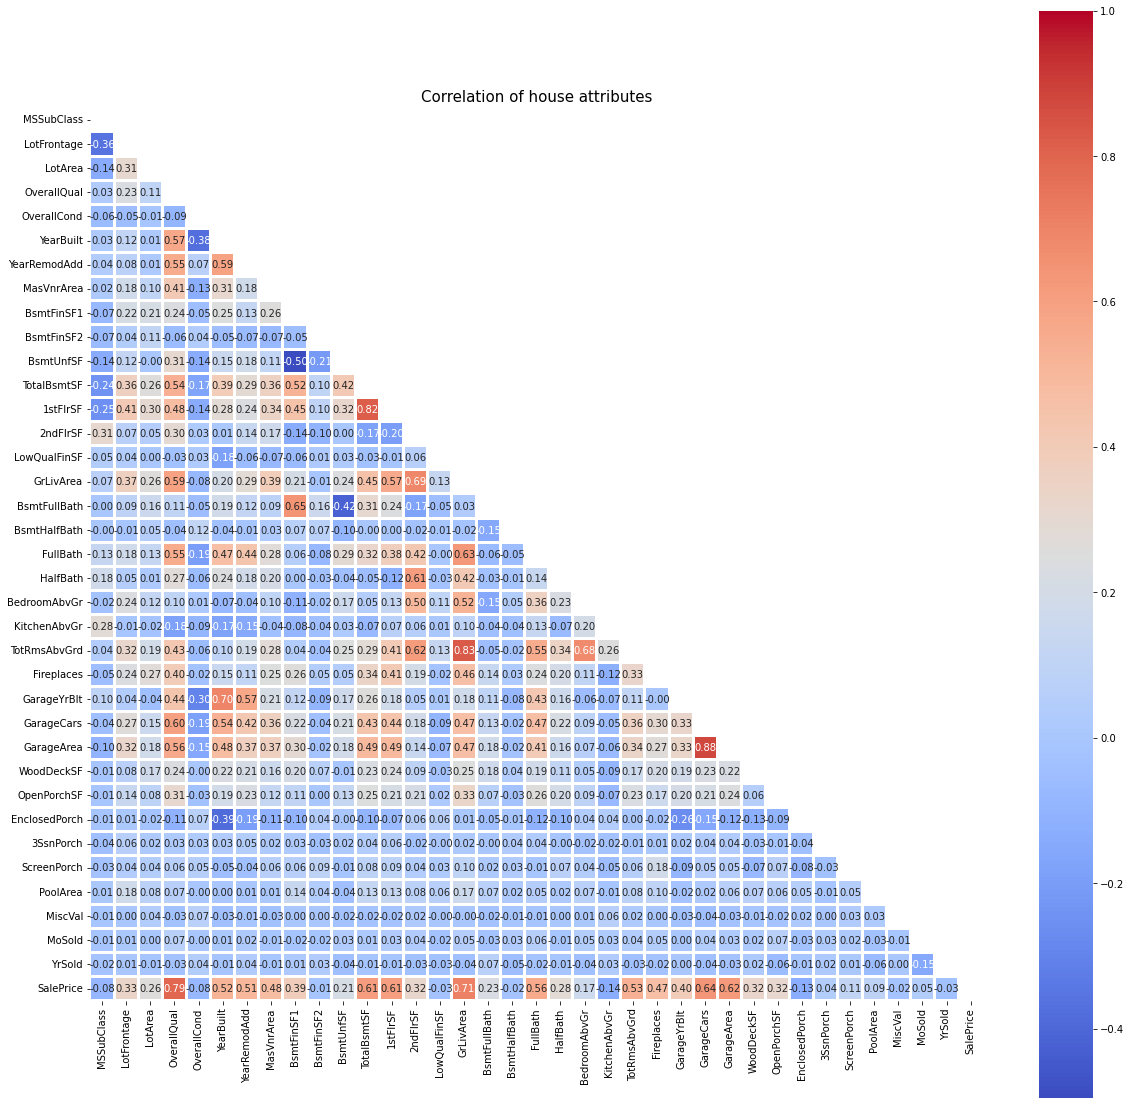

In [ ]:
corrmat = train.corr() # creating correlation variable to use in chart
mask = np.triu(corrmat) # as corellation chart are symetrical, we use a mask to only get half the chart
f, ax = plt.subplots(figsize=(20, 20)) #set up canvas size
ax = sns.heatmap(corrmat, # correlation data
                 vmax=1, #color map setup
                 cmap="coolwarm", #colormap
                 square=True, #make each value to be the same shape
                 annot=True,fmt = '.2f',  #showing values inside square
                 linewidth=2, 
                 mask = mask) # showing only half the map
plt.title('Correlation of house attributes', fontsize = 15) #set Chart title
plt.show()

In [ ]:
corrmat['SalePrice'].sort_values(ascending = True)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
GarageYrBlt      0.397778
Fireplaces       0.466929
MasVnrArea       0.475241
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

We can see here that there are several column directly relate to each other. We can see it simply just by looking at the name (e.g. GarageCars and GarageArea), and the correlation reflect that. These are:
- `GarageCars` and `GarageArea`
- `YearBuilt` and `GarageYrblt`
- `TotRmsAbvGrd` and `GrLivArea` and `BedroomAbvGrd` and `2ndFlrSF`
- `1stFlrSF` and `TotalBsmtSF`

Also `Yrsold` columns need to be transform into number of year since last transaction.

In [ ]:
train['YrSold'] = 2022-train['YrSold']
train.rename(columns ={'YrSold' : 'YrSinceLastTran'}, inplace = True)
test['YrSold'] = 2022-test['YrSold']
test.rename(columns ={'YrSold' : 'YrSinceLastTran'}, inplace = True)

In [ ]:
train = train.drop(columns = ['GarageCars', 'GarageYrBlt', 'BedroomAbvGr', '2ndFlrSF', 'TotalBsmtSF'])
test = test.drop(columns = ['GarageCars', 'GarageYrBlt', 'BedroomAbvGr', '2ndFlrSF', 'TotalBsmtSF'])

In [ ]:
display(train.head())
display(test.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSinceLastTran,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,856,0,1710,1,0,2,1,1,Gd,8,Typ,0,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,0,2,14,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,1,TA,6,Typ,1,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,0,5,15,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,920,0,1786,1,0,2,1,1,Gd,6,Typ,1,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,0,9,14,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,961,0,1717,1,0,1,0,1,Gd,7,Typ,1,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,0,2,16,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,1145,0,2198,1,0,2,1,1,Gd,9,Typ,1,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,0,12,14,WD,Normal,250000


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSinceLastTran,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,GasA,TA,Y,SBrkr,896,0,896,0.0,0.0,1,0,1,TA,5,Typ,0,Attchd,Unf,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,12,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,GasA,TA,Y,SBrkr,1329,0,1329,0.0,0.0,1,1,1,Gd,6,Typ,0,Attchd,Unf,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,12,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,GasA,Gd,Y,SBrkr,928,0,1629,0.0,0.0,2,1,1,TA,6,Typ,1,Attchd,Fin,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,12,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,GasA,Ex,Y,SBrkr,926,0,1604,0.0,0.0,2,1,1,Gd,7,Typ,1,Attchd,Fin,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,12,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,GasA,Ex,Y,SBrkr,1280,0,1280,0.0,0.0,2,0,1,Gd,5,Typ,0,Attchd,RFn,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,12,WD,Normal


## Transform data

In [ ]:
X_train = train.drop('SalePrice', axis = 1)
y_train = train['SalePrice']
X_test = test.copy()

There are several categorical features, in order to use them for our model, we will have to encode them.  
There will be 2 types of encode: 
- One Hot Encoding for simple categorical data
- Ordinal Encoding for hierarchy data

In [ ]:
one_hot_col = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 
               'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
              'Foundation', 'Heating', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']

ordinal_col = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir',
               'Electrical', 'ExterCond', 'ExterQual', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 
               'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandSlope', 'LotShape', 'Utilities']
#The left over are numerical columns
num_col = list(
    set(X_train.columns)
    -set(one_hot_col)
    -set(ordinal_col))

### One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

X_train_ohe = X_train[one_hot_col]
X_test_ohe = X_test[one_hot_col]
# Create the column transformations list + columns to which to apply
col_transforms = [('MSZoning', OneHotEncoder(), ['MSZoning']),
                  ('Street', OneHotEncoder(), ['Street']),
                  ('LandContour', OneHotEncoder(), ['LandContour']),
                  ('LotConfig', OneHotEncoder(), ['LotConfig']),
                  ('Neighborhood', OneHotEncoder(), ['Neighborhood']),
                  ('Condition1', OneHotEncoder(), ['Condition1']),
                  ('Condition2', OneHotEncoder(), ['Condition2']),
                  ('BldgType', OneHotEncoder(), ['BldgType']),
                  ('RoofStyle', OneHotEncoder(), ['RoofStyle']),
                  ('RoofMatl', OneHotEncoder(), ['RoofMatl']),
                  ('Exterior1st', OneHotEncoder(), ['Exterior1st']),
                  ('Exterior2nd', OneHotEncoder(), ['Exterior2nd']),
                  ('MasVnrType', OneHotEncoder(), ['MasVnrType']),
                  ('Foundation', OneHotEncoder(), ['Foundation']),
                  ('Heating', OneHotEncoder(), ['Heating']),
                  ('GarageType', OneHotEncoder(), ['GarageType']),
                  ('PavedDrive', OneHotEncoder(), ['PavedDrive']),
                  ('SaleType', OneHotEncoder(), ['SaleType']),
                  ('SaleCondition', OneHotEncoder(), ['SaleCondition'])
                 ]


# Create the column transformer
col_trans = ColumnTransformer(col_transforms)

# Fit
col_trans = col_trans.fit(X_train_ohe)
#transform
X_train_ohe_matrix = col_trans.transform(X_train_ohe)
X_test_ohe_matrix = col_trans.transform(X_test_ohe)
#revert back to df 
X_train_ohe = pd.DataFrame.sparse.from_spmatrix(X_train_ohe_matrix, columns = col_trans.get_feature_names())
X_test_ohe = pd.DataFrame.sparse.from_spmatrix(X_test_ohe_matrix, columns = col_trans.get_feature_names())

### Ordinal Encoding

For ordinal Encoding, we will need to manually define the structure of each features, from low (bad) to high (good). This is interpreted from the data dictionary.

In [ ]:
BsmtCond_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtExposure_ord = ['NA', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_ord = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
BsmtFinType2_ord = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
BsmtQual_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
CentralAir_ord = ['N', 'Y']
Electrical_ord = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
ExterCond_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterQual_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
FireplaceQu_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
Functional_ord = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
GarageCond_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageFinish_ord = ['NA', 'Unf', 'RFn', 'Fin']
GarageQual_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
HeatingQC_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
HouseStyle_ord = ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl']
KitchenQual_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
LandSlope_ord = ['Sev', 'Mod', 'Gtl']
LotShape_ord = ['IR3', 'IR2', 'IR1', 'Reg']
Utilities_ord = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']


ordinal_list = [BsmtCond_ord,BsmtExposure_ord,  BsmtFinType1_ord, BsmtFinType2_ord,BsmtQual_ord, 
                CentralAir_ord, Electrical_ord, ExterCond_ord,ExterQual_ord,
                Functional_ord, GarageCond_ord, GarageFinish_ord, GarageQual_ord, HeatingQC_ord, 
                HouseStyle_ord, KitchenQual_ord, LandSlope_ord, LotShape_ord, Utilities_ord            
               ]

In [ ]:
def ordinal_tran(data,order, col_name):
    OE = OrdinalEncoder(categories = [order])
    data[col_name] = OE.fit_transform(data[[col_name]])  

In [ ]:
#Separate these the one hot encoding columns
X_train_oe = X_train[ordinal_col]
X_test_oe = X_test[ordinal_col]

#transform
for i in range(len(ordinal_col)):
    ordinal_tran(X_train_oe,ordinal_list[i], X_train_oe.columns[i])
    ordinal_tran(X_test_oe,ordinal_list[i], X_test_oe.columns[i]) 

### Merging back to get the full df

In [ ]:
#join back to get the full dataframe
X_train = X_train[num_col].join(X_train_ohe).join(X_train_oe)
X_test = X_test[num_col].join(X_test_ohe).join(X_test_oe)

In [ ]:
X_train

,YrSinceLastTran,MSSubClass,MiscVal,OverallQual,OverallCond,KitchenAbvGr,HalfBath,OpenPorchSF,PoolArea,GrLivArea,YearRemodAdd,LotFrontage,ScreenPorch,BsmtUnfSF,GarageArea,BsmtFinSF2,EnclosedPorch,BsmtHalfBath,YearBuilt,BsmtFinSF1,1stFlrSF,TotRmsAbvGrd,3SsnPorch,WoodDeckSF,MoSold,BsmtFullBath,MasVnrArea,FullBath,Fireplaces,LotArea,LowQualFinSF,MSZoning__x0_C (all),MSZoning__x0_FV,MSZoning__x0_RH,MSZoning__x0_RL,MSZoning__x0_RM,Street__x0_Grvl,Street__x0_Pave,LandContour__x0_Bnk,LandContour__x0_HLS,LandContour__x0_Low,LandContour__x0_Lvl,LotConfig__x0_Corner,LotConfig__x0_CulDSac,LotConfig__x0_FR2,LotConfig__x0_FR3,LotConfig__x0_Inside,Neighborhood__x0_Blmngtn,Neighborhood__x0_Blueste,Neighborhood__x0_BrDale,Neighborhood__x0_BrkSide,Neighborhood__x0_ClearCr,Neighborhood__x0_CollgCr,Neighborhood__x0_Crawfor,Neighborhood__x0_Edwards,Neighborhood__x0_Gilbert,Neighborhood__x0_IDOTRR,Neighborhood__x0_MeadowV,Neighborhood__x0_Mitchel,Neighborhood__x0_NAmes,Neighborhood__x0_NPkVill,Neighborhood__x0_NWAmes,Neighborhood__x0_NoRidge,Neighborhood__x0_NridgHt,Neighborhood__x0_OldTown,Neighborhood__x0_SWISU,Neighborhood__x0_Sawyer,Neighborhood__x0_SawyerW,Neighborhood__x0_Somerst,Neighborhood__x0_StoneBr,Neighborhood__x0_Timber,Neighborhood__x0_Veenker,Condition1__x0_Artery,Condition1__x0_Feedr,Condition1__x0_Norm,Condition1__x0_PosA,Condition1__x0_PosN,Condition1__x0_RRAe,Condition1__x0_RRAn,Condition1__x0_RRNe,Condition1__x0_RRNn,Condition2__x0_Artery,Condition2__x0_Feedr,Condition2__x0_Norm,Condition2__x0_PosA,Condition2__x0_PosN,Condition2__x0_RRAe,Condition2__x0_RRAn,Condition2__x0_RRNn,BldgType__x0_1Fam,BldgType__x0_2fmCon,BldgType__x0_Duplex,BldgType__x0_Twnhs,BldgType__x0_TwnhsE,RoofStyle__x0_Flat,RoofStyle__x0_Gable,RoofStyle__x0_Gambrel,RoofStyle__x0_Hip,RoofStyle__x0_Mansard,RoofStyle__x0_Shed,RoofMatl__x0_ClyTile,RoofMatl__x0_CompShg,RoofMatl__x0_Membran,RoofMatl__x0_Metal,RoofMatl__x0_Roll,RoofMatl__x0_Tar&Grv,RoofMatl__x0_WdShake,RoofMatl__x0_WdShngl,Exterior1st__x0_AsbShng,Exterior1st__x0_AsphShn,Exterior1st__x0_BrkComm,Exterior1st__x0_BrkFace,Exterior1st__x0_CBlock,Exterior1st__x0_CemntBd,Exterior1st__x0_HdBoard,Exterior1st__x0_ImStucc,Exterior1st__x0_MetalSd,Exterior1st__x0_Plywood,Exterior1st__x0_Stone,Exterior1st__x0_Stucco,Exterior1st__x0_VinylSd,Exterior1st__x0_Wd Sdng,Exterior1st__x0_WdShing,Exterior2nd__x0_AsbShng,Exterior2nd__x0_AsphShn,Exterior2nd__x0_Brk Cmn,Exterior2nd__x0_BrkFace,Exterior2nd__x0_CBlock,Exterior2nd__x0_CmentBd,Exterior2nd__x0_HdBoard,Exterior2nd__x0_ImStucc,Exterior2nd__x0_MetalSd,Exterior2nd__x0_Other,Exterior2nd__x0_Plywood,Exterior2nd__x0_Stone,Exterior2nd__x0_Stucco,Exterior2nd__x0_VinylSd,Exterior2nd__x0_Wd Sdng,Exterior2nd__x0_Wd Shng,MasVnrType__x0_BrkCmn,MasVnrType__x0_BrkFace,MasVnrType__x0_None,MasVnrType__x0_Stone,Foundation__x0_BrkTil,Foundation__x0_CBlock,Foundation__x0_PConc,Foundation__x0_Slab,Foundation__x0_Stone,Foundation__x0_Wood,Heating__x0_Floor,Heating__x0_GasA,Heating__x0_GasW,Heating__x0_Grav,Heating__x0_OthW,Heating__x0_Wall,GarageType__x0_2Types,GarageType__x0_Attchd,GarageType__x0_Basment,GarageType__x0_BuiltIn,GarageType__x0_CarPort,GarageType__x0_Detchd,GarageType__x0_NA,PavedDrive__x0_N,PavedDrive__x0_P,PavedDrive__x0_Y,SaleType__x0_COD,SaleType__x0_CWD,SaleType__x0_Con,SaleType__x0_ConLD,SaleType__x0_ConLI,SaleType__x0_ConLw,SaleType__x0_New,SaleType__x0_Oth,SaleType__x0_WD,SaleCondition__x0_Abnorml,SaleCondition__x0_AdjLand,SaleCondition__x0_Alloca,SaleCondition__x0_Family,SaleCondition__x0_Normal,SaleCondition__x0_Partial,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Electrical,ExterCond,ExterQual,Functional,GarageCond,GarageFinish,GarageQual,HeatingQC,HouseStyle,KitchenQual,LandSlope,LotShape,Utilities
0,14,60,0,7,5,1,1,61,0,1710,2003,65.0,0,150,548,0,0,0,2003,706,856,8,0,0,2,1,196.0,2,0,8450,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
X_test

,YrSinceLastTran,MSSubClass,MiscVal,OverallQual,OverallCond,KitchenAbvGr,HalfBath,OpenPorchSF,PoolArea,GrLivArea,YearRemodAdd,LotFrontage,ScreenPorch,BsmtUnfSF,GarageArea,BsmtFinSF2,EnclosedPorch,BsmtHalfBath,YearBuilt,BsmtFinSF1,1stFlrSF,TotRmsAbvGrd,3SsnPorch,WoodDeckSF,MoSold,BsmtFullBath,MasVnrArea,FullBath,Fireplaces,LotArea,LowQualFinSF,MSZoning__x0_C (all),MSZoning__x0_FV,MSZoning__x0_RH,MSZoning__x0_RL,MSZoning__x0_RM,Street__x0_Grvl,Street__x0_Pave,LandContour__x0_Bnk,LandContour__x0_HLS,LandContour__x0_Low,LandContour__x0_Lvl,LotConfig__x0_Corner,LotConfig__x0_CulDSac,LotConfig__x0_FR2,LotConfig__x0_FR3,LotConfig__x0_Inside,Neighborhood__x0_Blmngtn,Neighborhood__x0_Blueste,Neighborhood__x0_BrDale,Neighborhood__x0_BrkSide,Neighborhood__x0_ClearCr,Neighborhood__x0_CollgCr,Neighborhood__x0_Crawfor,Neighborhood__x0_Edwards,Neighborhood__x0_Gilbert,Neighborhood__x0_IDOTRR,Neighborhood__x0_MeadowV,Neighborhood__x0_Mitchel,Neighborhood__x0_NAmes,Neighborhood__x0_NPkVill,Neighborhood__x0_NWAmes,Neighborhood__x0_NoRidge,Neighborhood__x0_NridgHt,Neighborhood__x0_OldTown,Neighborhood__x0_SWISU,Neighborhood__x0_Sawyer,Neighborhood__x0_SawyerW,Neighborhood__x0_Somerst,Neighborhood__x0_StoneBr,Neighborhood__x0_Timber,Neighborhood__x0_Veenker,Condition1__x0_Artery,Condition1__x0_Feedr,Condition1__x0_Norm,Condition1__x0_PosA,Condition1__x0_PosN,Condition1__x0_RRAe,Condition1__x0_RRAn,Condition1__x0_RRNe,Condition1__x0_RRNn,Condition2__x0_Artery,Condition2__x0_Feedr,Condition2__x0_Norm,Condition2__x0_PosA,Condition2__x0_PosN,Condition2__x0_RRAe,Condition2__x0_RRAn,Condition2__x0_RRNn,BldgType__x0_1Fam,BldgType__x0_2fmCon,BldgType__x0_Duplex,BldgType__x0_Twnhs,BldgType__x0_TwnhsE,RoofStyle__x0_Flat,RoofStyle__x0_Gable,RoofStyle__x0_Gambrel,RoofStyle__x0_Hip,RoofStyle__x0_Mansard,RoofStyle__x0_Shed,RoofMatl__x0_ClyTile,RoofMatl__x0_CompShg,RoofMatl__x0_Membran,RoofMatl__x0_Metal,RoofMatl__x0_Roll,RoofMatl__x0_Tar&Grv,RoofMatl__x0_WdShake,RoofMatl__x0_WdShngl,Exterior1st__x0_AsbShng,Exterior1st__x0_AsphShn,Exterior1st__x0_BrkComm,Exterior1st__x0_BrkFace,Exterior1st__x0_CBlock,Exterior1st__x0_CemntBd,Exterior1st__x0_HdBoard,Exterior1st__x0_ImStucc,Exterior1st__x0_MetalSd,Exterior1st__x0_Plywood,Exterior1st__x0_Stone,Exterior1st__x0_Stucco,Exterior1st__x0_VinylSd,Exterior1st__x0_Wd Sdng,Exterior1st__x0_WdShing,Exterior2nd__x0_AsbShng,Exterior2nd__x0_AsphShn,Exterior2nd__x0_Brk Cmn,Exterior2nd__x0_BrkFace,Exterior2nd__x0_CBlock,Exterior2nd__x0_CmentBd,Exterior2nd__x0_HdBoard,Exterior2nd__x0_ImStucc,Exterior2nd__x0_MetalSd,Exterior2nd__x0_Other,Exterior2nd__x0_Plywood,Exterior2nd__x0_Stone,Exterior2nd__x0_Stucco,Exterior2nd__x0_VinylSd,Exterior2nd__x0_Wd Sdng,Exterior2nd__x0_Wd Shng,MasVnrType__x0_BrkCmn,MasVnrType__x0_BrkFace,MasVnrType__x0_None,MasVnrType__x0_Stone,Foundation__x0_BrkTil,Foundation__x0_CBlock,Foundation__x0_PConc,Foundation__x0_Slab,Foundation__x0_Stone,Foundation__x0_Wood,Heating__x0_Floor,Heating__x0_GasA,Heating__x0_GasW,Heating__x0_Grav,Heating__x0_OthW,Heating__x0_Wall,GarageType__x0_2Types,GarageType__x0_Attchd,GarageType__x0_Basment,GarageType__x0_BuiltIn,GarageType__x0_CarPort,GarageType__x0_Detchd,GarageType__x0_NA,PavedDrive__x0_N,PavedDrive__x0_P,PavedDrive__x0_Y,SaleType__x0_COD,SaleType__x0_CWD,SaleType__x0_Con,SaleType__x0_ConLD,SaleType__x0_ConLI,SaleType__x0_ConLw,SaleType__x0_New,SaleType__x0_Oth,SaleType__x0_WD,SaleCondition__x0_Abnorml,SaleCondition__x0_AdjLand,SaleCondition__x0_Alloca,SaleCondition__x0_Family,SaleCondition__x0_Normal,SaleCondition__x0_Partial,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Electrical,ExterCond,ExterQual,Functional,GarageCond,GarageFinish,GarageQual,HeatingQC,HouseStyle,KitchenQual,LandSlope,LotShape,Utilities
0,12,20,0,5,6,1,0,0,0,896,1961,80.0,120,270.0,730.0,144.0,0,0.0,1961,468.0,896,5,0,140,6,0.0,0.0,1,0,11622,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) #We will only use X_test as a final test for our model to prevent data leakage, every model tunning will only use train data

## Modelling

### Baseline model

For a starting point, we will try a few standards models for regression problems.They will be used as our baseline model to compare with more and more complex model later

In [ ]:
MSLE = {}
MAE = {}
def scoring(model_name, y_hat):
  MSLE[model_name] = mean_squared_log_error(y_train, y_hat)
  MAE[model_name] = mean_absolute_error(y_train, y_hat)



#### Linear Regression

In [ ]:
LR = LinearRegression()
LR = LR.fit(X_train_scaled, y_train)
y_hat_lr = LR.predict(X_train_scaled)

In [ ]:
scoring('Linear Regression', y_hat_lr)

#### Lasso (Least Absolute Selection Shrinkage Operator)


In [ ]:
lasso = Lasso()
lasso = lasso.fit(X_train_scaled, y_train)
y_hat_lasso = lasso.predict(X_train_scaled)

In [ ]:
scoring('Lasso', y_hat_lasso)

#### SVR (Support Vector Regression)

In [ ]:
SVR_model = SVR()
SVR_model = SVR_model.fit(X_train_scaled, y_train)
y_hat_svr = SVR_model.predict(X_train_scaled)

In [ ]:
scoring('SVR', y_hat_svr)

### Randomize search

By using the baseline model, there are a few things that we need to do:  
- Hyperparameters turning
- Cross validation to reduce overfitting

We will use randomizer search to do both tasks

In [ ]:
my_grid_LR = {
    'scaler' : [StandardScaler()],
    'model' : [LinearRegression()]

}

my_grid_svr = {
    'scaler' : [StandardScaler()],
    'model' : [SVR()],
    'model__kernel' : ['linear', 'rbf', 'poly'],
    'model__degree' : [2,3,4],
    'model__C' : [1,2],
    'model__gamma' : ['scale', 'auto'],
    'model__epsilon' : [0.01,0.1,]
}

my_grid_lasso = {
    'scaler' : [StandardScaler()],
    'model' : [Lasso()],

    'model__alpha' : [0.1, 0.5, 1],
    'model__max_iter' : [1000,1500,2000],
    'model__tol' : [0.0001,0.001,0.01],
    'model__positive' : [True, False],
    'model__selection' : ['cyclic', 'random']
      
}

In [ ]:
my_grid = [my_grid_LR, my_grid_svr, my_grid_lasso]
my_steps = [('scaler', StandardScaler()),
            ('model', LinearRegression())
            ]

my_pipe = Pipeline(my_steps)

randomize_search = RandomizedSearchCV(my_pipe,
                                      my_grid,cv = 5, #using cross validation
                                      n_iter=5,
                                     scoring = 'neg_mean_squared_log_error')

In [ ]:
randomize_search.fit(X_train, y_train)
y_hat_ran = randomize_search.predict(X_train)

In [ ]:
scoring('Randomize', y_hat_ran)

### Randomize search with ensemble models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

my_grid_RF = {'scaler': [StandardScaler()],
               'model': [RandomForestRegressor()],
               'model__n_estimators': [10*i for i in range(1,11)],
               'model__bootstrap' : [True, False],
               'model__max_depth' : range(1,len(X_train.columns)),
               'model__max_features' : ['auto', 'sqrt', 'log2'],
               'model__min_samples_split' : [2,5,10],
               'model__min_samples_leaf' : [1,2,4]              
             }

my_grid_GB = {'scaler': [StandardScaler()],
               'model': [GradientBoostingRegressor()],
               'model__learning_rate': [10**i for i in range(-5,5)],
               'model__n_estimators': [10*i for i in range(3,11)],
               'model__max_depth' : range(1,len(X_train.columns)),
               'model__criterion' : ['friedman_mse', 'mse', 'mae'],
               'model__min_samples_split' : [2,5,10],
               'model__min_samples_leaf' : [1,2,4]}              

my_grid_xgb = {'scaler': [StandardScaler()],
               'model': [XGB.XGBRegressor],    
                'model__objective':['reg:linear'],
                'model__learning_rate': [0.03, 0.05], 
                'model__max_depth': [3,4],
                'model__min_child_weight': [2,3,],
                'model__reg_lamda' : [0.8,0.9],
                'model__reg_alpha' : [0.4, 0.5],
                'model__subsample': [0.5,0.7],
                'model__n_estimators': [2000,2500]}

In [ ]:
my_grid = [my_grid_RF, my_grid_GB,my_grid_xgb]
my_steps = [('scaler', StandardScaler()), 
            ('model', RandomForestRegressor())]

my_pipe = Pipeline(my_steps)

randomize_search_ens = RandomizedSearchCV(my_pipe,my_grid,cv = 5,
                                      n_iter=30,
                                     scoring = 'neg_mean_squared_log_error')

In [ ]:
randomize_search_ens.fit(X_train, y_train)
y_hat_ens = randomize_search_ens.predict(X_train)

In [ ]:
scoring('Ensemble', y_hat_ens)

### Stacking ensemble models with 1 layer


In [ ]:
#Set up grid search to get the best of each single model
my_grid_LR = {
    'scaler' : [StandardScaler()],
    'model' : [LinearRegression()]

}

my_grid_svr = {
    'scaler' : [StandardScaler()],
    'model' : [SVR()],
    'model__kernel' : ['linear', 'rbf', 'poly'],
    'model__degree' : [2,3,4],
    'model__C' : [1,2],
    'model__gamma' : ['scale', 'auto'],
    'model__epsilon' : [0.01,0.1,]
}

my_grid_lasso = {
    'scaler' : [StandardScaler()],
    'model' : [Lasso()],

    'model__alpha' : [0.1, 0.5, 1],
    'model__max_iter' : [1000,1500,2000],
    'model__tol' : [0.0001,0.001,0.01],
    'model__positive' : [True, False],
    'model__selection' : ['cyclic', 'random']
    }

my_grid_XGB = {
    'scaler': [StandardScaler()],
    'model': [XGB.XGBRegressor()],
    'model__learning_rate': [0.03, 0.05], 
    'model__max_depth': [3,4],
    'model__min_child_weight': [2,3,],
    'model__reg_lamda' : [0.8,0.9],
    'model__reg_alpha' : [0.4, 0.5],
    'model__subsample': [0.5,0.7],
    'model__n_estimators': [2000,2500],
    'model__verbosity' :[0]
    }


my_grid_GB = {
      'scaler': [StandardScaler()],
      'model': [GradientBoostingRegressor()],
      'model__learning_rate': [10**i for i in range(-5,5)],
      'model__n_estimators': [10*i for i in range(3,11)],
      'model__max_depth' : range(1,len(X_train.columns)),
      'model__criterion' : ['friedman_mse', 'mse', 'mae'],
      'model__min_samples_split' : [2,5,10],
      'model__min_samples_leaf' : [1,2,4]} 

In [ ]:
# Def grid search function
def random_search(para):
  my_steps = [('scaler', StandardScaler()),
            ('model', GradientBoostingRegressor()) #Place holder for any model
            ]
  my_pipe = Pipeline(my_steps)
  model = RandomizedSearchCV(my_pipe, 
                             para, 
                             cv = 5, 
                             n_iter = 15,
                             scoring = 'neg_mean_squared_log_error')
  model.fit(X_train, y_train)

  return model

In [ ]:
#Optimized parameters by using randomize search for each model

# Linear Regression
LR_model = random_search(my_grid_LR)
#Lasso
lasso_model = random_search(my_grid_lasso)
#SVR
SVR_model = random_search(my_grid_svr)
#Gradient boosting
GB_model = random_search(my_grid_GB)
#XGB
xgb_model = random_search(my_grid_XGB)


In [ ]:
#update each model with it's best hyperparameters found
LR_model = LR_model.best_estimator_
lasso_model = lasso_model.best_estimator_
SVR_model = SVR_model.best_estimator_
GB_model = GB_model.best_estimator_
xgb_model = xgb_model.best_estimator_

In [ ]:
estimators = [('LR', LR_model),
              ('lasso', lasso_model),
              ('SVR', SVR_model),
              ('Gradient boosting', GB_model),
              ('xgb', xgb_model)
              ]
stack_model = StackingRegressor(
                        estimators=estimators,
                        final_estimator=LR_model,
                        cv = 5)

In [ ]:
stack_model.fit(X_train,y_train)
y_hat_stack = stack_model.predict(X_train)

In [ ]:
scoring('stack models', y_hat_stack)

### Stackting ensemble models with 2 layers

In [ ]:
estimators1 = [('LR', LR_model),
              ('lasso', lasso_model),
              ('SVR', SVR_model)
              ]

estimators2 = [('SVR', SVR_model),
              ('Gradient boosting', GB_model),
              ('xgb', xgb_model)
              ]

estimators3 = [('SVR', SVR_model),
              ('lasso', lasso_model),
              ('xgb', xgb_model)
              ]

stack_model_1 = StackingRegressor(
                        estimators=estimators1,
                        final_estimator = LR_model,
                        cv = 5)

stack_model_2 = StackingRegressor(
                        estimators=estimators2,
                        final_estimator = LR_model,
                        cv = 5)

stack_model_3 = StackingRegressor(
                        estimators=estimators3,
                        final_estimator = LR_model,
                        cv = 5)



In [ ]:
stack_model_1 = stack_model_1.fit(X_train, y_train)
stack_model_2 = stack_model_2.fit(X_train, y_train)
stack_model_3 = stack_model_3.fit(X_train, y_train)

In [ ]:
mean_squared_log_error(y_train, stack_model_2.predict(X_train))

0.002374746466512644

In [ ]:
estimators_layer_2 = [('stack_model_1', stack_model_1),
              ('stack_model_2', stack_model_2),
              ('stack_model_3', stack_model_3)
              ]

stack_model_layer_2 =    StackingRegressor(
                        estimators=estimators_layer_2,
                        final_estimator=LR_model,
                        cv = 5)      

In [ ]:
stack_model_layer_2.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('stack_model_1',
                               StackingRegressor(cv=5,
                                                 estimators=[('LR',
                                                              Pipeline(steps=[('scaler',
                                                                               StandardScaler()),
                                                                              ('model',
                                                                               LinearRegression())])),
                                                             ('lasso',
                                                              Pipeline(steps=[('scaler',
                                                                               StandardScaler()),
                                                                              ('model',
                                                                               La

In [ ]:
y_hat_stack_2 = stack_model_layer_2.predict(X_train)

In [ ]:
scoring('stack_model_layer_2',y_hat_stack_2)

In [ ]:
MSLE

{'Ensemble': 0.006294769319068628,
 'Lasso': 0.017366670399887346,
 'Linear Regression': 0.017337533987584215,
 'Randomize': 0.15966136477456375,
 'SVR': 0.1598099338325236,
 'stack models': 0.002078814248235508,
 'stack_model_layer_2': 0.0017200274194538894}

## Evaluating models

## Finallizing models

# Testing area


In [ ]:
xgb1 = XGB.XGBRegressor()
parameters = {
              'objective':['reg:linear'],
              'learning_rate': [0.03, 0.05], 
              'max_depth': [3,4],
              'min_child_weight': [2,3,],
              'reg_lamda' : [0.8,0.9],
              'reg_alpha' : [0.4, 0.5],
              'subsample': [0.5,0.7],
               'n_estimators': [2000,2500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        verbose=True)

xgb_grid.fit(X_train_scaled, y_train)

In [ ]:
xgb1.fit(X_train_scaled,y_train)

In [ ]:
y_hat_xgb = xgb1.predict(X_train_scaled)
mean_squared_log_error(y_train, y_hat_xgb)